# Check the Chapter 7 IRF

Piers 

In [2]:
from ar6.twolayermodel import TwoLayerModel
import numpy as np
import matplotlib.pyplot as pl
from tqdm import tqdm
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as pl
import os
from matplotlib import gridspec, rc
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from netCDF4 import Dataset
import warnings
#from openscm_units import unit_registry  # pip install openscm-units
#from openscm_twolayermodel import ImpulseResponseModel, TwoLayerModel, constants  # pip install openscm-twolayermodel
#from scmdata import ScmRun  # pip install scmdata

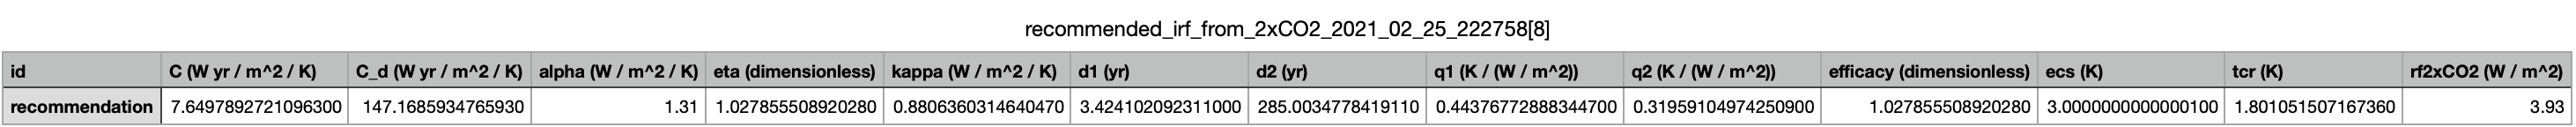

In [3]:
recommend_paras = pd.read_csv("../data_input/recommended_irf_from_2xCO2_2021_02_25_222758.csv").iloc[0, :]
recommend_paras

id                          recommendation
C (W yr / m^2 / K)                 7.64979
C_d (W yr / m^2 / K)               147.169
alpha (W / m^2 / K)                   1.31
eta (dimensionless)                1.02786
kappa (W / m^2 / K)               0.880636
d1 (yr)                             3.4241
d2 (yr)                            285.003
q1 (K / (W / m^2))                0.443768
q2 (K / (W / m^2))                0.319591
efficacy (dimensionless)           1.02786
ecs (K)                                  3
tcr (K)                            1.80105
rf2xCO2 (W / m^2)                     3.93
Name: 0, dtype: object

In [4]:
AR6_forcing = pd.read_csv('../data_output/AR6_ERF_1750-2019.csv', index_col=0)

In [5]:
ch6_forcing = pd.read_csv('/Users/earpmf/OneDrive - University of Leeds/PYTHON/AR6_CH6_RCMIPFIGS-fig_6.12_contrib_ERF_GSAT_hist/ar6_ch6_rcmipfigs/data_out/historic_delta_GSAT/hist_ERF_est.csv', index_col=0)

In [6]:
ch6_GSAT = pd.read_csv('/Users/earpmf/OneDrive - University of Leeds/PYTHON/AR6_CH6_RCMIPFIGS-fig_6.12_contrib_ERF_GSAT_hist/ar6_ch6_rcmipfigs/data_out/historic_delta_GSAT/Delta_T_timeseriies.csv', index_col=0)

In [7]:
ch6_forcing


,CO2,N2O,CH4,NOx,SO2,BC,OC,NH3,VOC,HC
1750,0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000,-0.000000,0.000000,0.000000
1751,0.001126,0.000077,0.000832,-0.000001,-0.000053,0.000014,-0.000119,-0.000005,0.000177,0.000000
1752,0.002252,0.000154,0.001663,-0.000002,-0.000091,0.000028,-0.000237,-0.000010,0.000354,0.000000
1753,0.003378,0.000230,0.002495,-0.000004,-0.000124,0.000043,-0.000356,-0.000014,0.000530,0.000000
1754,0.004505,0.000307,0.003326,-0.000005,-0.000160,0.000057,-0.000474,-0.000019,0.000706,0.000000
...,...,...,...,...,...,...,...,...,...,...
2015,1.894420,0.223577,1.171873,-0.295162,-0.994594,0.065084,-0.201918,-0.029726,0.481837,0.200667
2016,1.948068,0.226732,1.180530,-0.291303,-0.953730,0.063885,-0.202334,-0.030035,0.464815,0.201919
2017,1.981696,0.230251,1.188029,-0.290949,-0.918519,0.063844,-0.202386,-0.030378,0.458057,0.203356
2018,2.019078,0.234670,1.197088,-0.288873,-0.913279,0.063397,-0.200986,-0.030660,0.452975,0.204997


In [8]:
ch6_GSAT

,CO2,N2O,CH4,NOx,SO2,BC,OC,NH3,VOC,HC
year,,,,,,,,,,
1750,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1751,0.000147,0.000010,0.000109,-1.534412e-07,-0.000007,0.000002,-0.000016,-6.248794e-07,0.000023,0.000000
1752,0.000405,0.000028,0.000299,-4.229968e-07,-0.000017,0.000005,-0.000043,-1.717622e-06,0.000064,0.000000
1753,0.000745,0.000051,0.000550,-7.781722e-07,-0.000029,0.000009,-0.000078,-3.160974e-06,0.000117,0.000000
1754,0.001147,0.000078,0.000847,-1.198815e-06,-0.000043,0.000014,-0.000121,-4.867373e-06,0.000180,0.000000
...,...,...,...,...,...,...,...,...,...,...
2015,1.017607,0.121303,0.668071,-1.714400e-01,-0.669099,0.039113,-0.119377,-1.638171e-02,0.296524,0.108567
2016,1.039232,0.123298,0.673168,-1.701955e-01,-0.649515,0.038738,-0.119548,-1.655779e-02,0.292309,0.109317
2017,1.060235,0.125301,0.678216,-1.692870e-01,-0.630467,0.038466,-0.119725,-1.674113e-02,0.288373,0.110115


In [12]:
for column in ch6_forcing:

#Chapter 6 recomended parameters 
    scm = TwoLayerModel(
        extforce=ch6_forcing[column],
        exttime=np.arange(270)+1750,
        tbeg=1750,
        tend=2020,
        lamg=3.93/3.0000000000000100,
        t2x=None,
#        eff=1,
        eff=1.027855508920280,
        cmix=7.6497892721096300,
        cdeep=147.1685934765930,
        gamma_2l=0.8806360314640470,

        outtime=np.arange(1750.5,2020),
        dt=.2
    )
    out_chap6 = scm.run()

#Chapter 7/FaiR
    scm = TwoLayerModel(
        extforce=ch6_forcing[column],
        exttime=np.arange(270)+1750,
        tbeg=1750,
        tend=2020,
        lamg=4.03740298766209/2.95338856391219,
        t2x=None,
#        eff=1,
        eff=1.29330398178594,
        cmix=8.32378368537292,
        cdeep=122.471518566987,
        gamma_2l=0.655173452102104,

        outtime=np.arange(1750.5,2020),
        dt=.2
    )
    out_chap7 = scm.run()
    print (out_chap6.time[-1],out_chap6.tg[-1],out_chap6.tg[-1]/ch6_GSAT[column].values[-1])

2019.5 0.9698382617979385 0.8796822632413374
2019.5 0.11403224266642936 0.8804076928919468
2019.5 0.6083011004163188 0.8831642046024858
2019.5 -0.14752019355938686 0.8809477775992618
2019.5 -0.5366224834681945 0.8899534106123251
2019.5 0.03358064387997362 0.8843397563229152
2019.5 -0.105816532670485 0.8853482394916008
2019.5 -0.015054181378467904 0.8802261129556896
2019.5 0.24985482003677087 0.8868721212496199
2019.5 0.09806840924332837 0.8767779987780977
